# Introduction

A GPS navigation system provides directions to thousands of users on a daily basis. The ultimate goal of a navigation system is to be able to get a user from point A to point B in the most efficient way possible. Dealing with accidents puts a great strain on this goal. Accidents are commonplace in every city, creating complication for drivers and navigation systems alike. Thus it is beneficial for the system to be able to detect the severity of an accident in order to determine if there are more efficient ways to route a user in a non conventional way. 

### Problem

This project seeks to build a model which can successfully predict the severity of an accident.

### Interest

The interested party in this problem would be a a navigation company. A navigation company can use this model to determine whether it would be more efficient to let the driver pass through traffic, or avoid it. Furthermore, it could be a safety measure as well, deterring drivers from driving towards sites of heavy collision. It would be beneficial for both the driver and the GPS company.

# Data

Based on our description of the problem it is important that we get relevant accident information in order to build our model. Factors which we we would need would include the location of the accident, the date, the weather, whether intoxication was involved and more. 

In order to obtain this information, a car accident dataset from data collected in Seattle will be used. This data was collected as part of the IBM Capstone Project Course which provided us with the dataset.

The dataset contains columns: 'SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO','STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE','EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE','INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC','INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND','PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY' and 'HITPARKEDCAR'. We must first drop columns which are redundant or appear in other forms. An example of such columns are the SEVERITYCODE and SEVERITYCODE.1 columns. They hold the same values, so it is meaningless to include both columns in our dataset.

After the relevant variables are gathered, we then plot the variables against the SEVERITYCODE labels to determine if they have any influence on whether or not an accident is an injury causing accident or a property damage causing. Dropping the irrelevant variables here, give us a more rigid set of variables which we can then use for training our model.

The data then needs its categorical variables factorized so they can be used in models. Once it's all done, the data will be normalized so variables don't have more influence over others in the model. Finally, the Decision Trees, KNN, SVM and Logistic Regression models will be created using the data and the test data will be made using 10% of the dataset. The model with the best scores across precision, recall and f1-scores will be the model selected as the best model.

# Methodology

Our goal of this project is to successfully predict accidents by their true severity. To do this, we must have a large amount of samples for accident data. The dataset selected, contains data from Seattle which was provided by the IBM Applied Data Science Capstone Course. 

We will plot categorical variables against the severity code categorical variable by using bar charts to compare shapes to see if there are differences in distribution. Side by side boxplots will be used to plot quantitative variables against the severity categorical variable to see differences in distribution of data. Variables which are variations of other variables, have no variation in fraudulent transactions or are insignificant will be excluded from the model. 

After the unnecessary variables are dropped from our dataset, we factorize the categorical variables to give categories a numerical representation so that they can be modelled on. Normalization will take place so variables like state collision code, which have large number values, don't have higher impact on our model than other variables like category of purchase.

Finally, since this is a classification problem, we will build a model using decision trees, KNN, SVM and logistic regression for fraud detection. Each model will then be tested by calculating it's precision, recall and f1-scores. We will not be focusing on precision or recall by itself, we will be considering models which have a high precision and recall score for greatest accuracy in our model. Models based around fraud detection may rely heavily on recall scores but since our goal is to detect the severity of an accident for consumer purposes, we will be focusing on all rounded model which excels in precision, recall and f1-score.

### Analysis

We must combine the data and perform analysis on the relevant variables in order to determine which variables are crucial to our model.

In [1]:
import pandas as pd
import numpy as np

We have been given train and test datasets however instead of using split tables, lets split the data ourselves later. For now we will combine both train and test datasets. Now we look at the data types in the dataset 

In [2]:
dataset = pd.read_csv("Data-Collisions.csv", low_memory=False)
dataset.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [3]:
dataset.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [4]:
df = dataset

We will drop columns which are seemingly irrelevant to the output of the model. This includes unique values, redundant columns, values with very high values of NaN etc.

We can now get the counts of missing values in the dataset to determine which values we need to replace

In [5]:
drop_list = ['OBJECTID', 'COLLISIONTYPE', 'INCKEY','SEVERITYCODE.1', 'COLDETKEY', 'REPORTNO', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',  'INCDATE' , 'SDOT_COLDESC', 'PEDROWNOTGRNT', 'ST_COLDESC' ]
df = df.drop(drop_list, axis=1)

In [6]:
missing_data = df.isnull()
for col in missing_data.columns.values.tolist():
    print(col)
    print(missing_data[col].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLCODE
False    194673
Name: SDOT_COLCODE, dtype: int64

INATTENTIONIND
True     164868
False     29805
Name: INATTENTIONIND, dtyp

We will now drop columns which have a high percentage of it's data missing

In [7]:
drop_list = ['INTKEY', 'INATTENTIONIND', 'SDOTCOLNUM', 'SPEEDING']
df = df.drop(drop_list, axis=1)

Now we look at the data types again in the dataset to determine how to plot the variables. This is important because we can see the impact each variable has on fraudulent and non fraudulent transactions

In [8]:
missing_data = df.isnull()
for col in missing_data.columns.values.tolist():
    print(col)
    print(missing_data[col].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLCODE
False    194673
Name: SDOT_COLCODE, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

In [9]:
pd.set_option('max_columns', None)

The only columns which can provide us with the information we need for SDOT_COLCODE are COLLISIONTYPE and SDOT_COLDESC

In [10]:
dataset[df['ST_COLCODE'].isnull()]

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
172392,2,-122.342372,47.622056,192928,265998,266798,3753785,Matched,Intersection,28783.0,DEXTER AVE N AND HARRISON ST,,NaN,2,Injury Collision,NaN,2,0,1,1,2018/01/17 00:00:00+00,1/17/2018 8:50:00 AM,At Intersection (intersection related),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Overcast,Wet,Daylight,Y,NaN,NaN,NaN,NaN,0,0,N
172836,2,-122.354678,47.677668,193514,265357,266157,3705689,Matched,Intersection,24351.0,PHINNEY AVE N AND N 67TH S ST,,NaN,2,Injury Collision,NaN,2,0,1,1,2018/01/09 00:00:00+00,1/9/2018 10:13:00 AM,At Intersection (intersection related),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Raining,Wet,Daylight,NaN,NaN,NaN,NaN,NaN,4288,0,N
172973,2,-122.358251,47.639596,193728,265181,265961,E757814,Matched,Intersection,27815.0,1ST AVE W AND W MCGRAW ST,,NaN,2,Injury Collision,NaN,3,0,1,1,2018/01/08 00:00:00+00,1/8/2018 1:43:00 PM,At Intersection (intersection related),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,NaN,NaN,0,0,N
173295,2,-122.313262,47.656215,194181,267682,268462,3769416,Matched,Intersection,27143.0,UNIVERSITY WAY NE AND NE CAMPUS WB PY,,NaN,2,Injury Collision,NaN,3,0,1,1,2018/01/25 00:00:00+00,1/25/2018 8:23:00 AM,At Intersection (intersection related),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Overcast,Unknown,Daylight,Y,NaN,NaN,NaN,NaN,0,0,N
173402,1,-122.335976,47.607763,194341,267923,268703,3811927,Matched,Intersection,29601.0,3RD AVE AND UNIVERSITY ST,,NaN,1,Property Damage Only Collision,NaN,3,0,1,1,2018/01/27 00:00:00+00,1/27/2018 3:20:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Overcast,Dry,Daylight,NaN,NaN,NaN,NaN,NaN,0,0,N
173476,2,-122.334215,47.555663,194450,265138,265918,E757849,Matched,Intersection,33026.0,1ST AVE S AND S DAWSON ST,,NaN,2,Injury Collision,NaN,2,0,1,1,2018/01/09 00:00:00+00,1/9/2018 12:59:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Raining,Wet,Daylight,NaN,NaN,NaN,NaN,NaN,0,0,N
173683,2,-122.332538,47.662627,194752,264221,265001,3705804,Matched,Intersection,25875.0,BAGLEY AVE N AND N 46TH ST,,NaN,2,Injury Collision,NaN,2,0,1,1,2018/01/05 00:00:00+00,1/5/2018 2:50:00 PM,At Intersection (intersection related),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Raining,Wet,Daylight,NaN,NaN,Y,NaN,NaN,0,0,N
173904,2,-122.322130,47.615226,195028,272157,272997,3702429,Matched,Intersection,29735.0,HARVARD AVE AND E PINE ST,,NaN,2,Injury Collision,NaN,1,0,1,0,2018/02/22 00:00:00+00,2/22/2018 8:25:00 AM,At Intersection (intersection related),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Clear,Ice,Daylight,NaN,NaN,NaN,NaN,NaN,0,0,N
174197,2,-122.313460,47.555192,195363,266678,267458,3563140,Matched,Block,NaN,15TH AVE S BETWEEN S DAWSON ST AND S BENNETT ST,,NaN,2,Injury Collision,NaN,2,0,1,1,2018/01/14 00:00:00+00,1/14/2018 11:28:00 PM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,N,Clear,Dry,Dark - Street Lights On,NaN,NaN,NaN,NaN,NaN,0,0,N
174365,1,-122.334215,47.554166,195566,274937,275777,E774902,Matched,Intersection,33029.0,1ST AVE S AND S BRANDON ST,,NaN,1,Property Damage Only Collision,NaN,2,0,1,1,2018/02/08 00:00:00+00,2/8/2018 6:40:00 PM,At Intersection (intersection related),18,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Raining,Wet,Dark - No Street Lights,NaN,NaN,NaN,NaN,NaN,0,0,N


We can see that there is no information available for the accident type that we can replace the SDOT_COLCODE with so we will use the mode to replace the missing values with the most common value

In [11]:
st = df['ST_COLCODE']
st_mode = st.mode()
st_mode=st_mode.values[0]
df['ST_COLCODE'] = df['ST_COLCODE'].replace(np.nan, st_mode)

Lets look at the missing data again

In [12]:
missing_data = df.isnull()
for col in missing_data.columns.values.tolist():
    print(col)
    print(missing_data[col].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLCODE
False    194673
Name: SDOT_COLCODE, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

Now we will set the mode of all variables which cannot be determined by other variables

In [13]:
light = df['LIGHTCOND']
light_mode = light.mode()
light_mode=light_mode.values[0]
df['LIGHTCOND'] = df['LIGHTCOND'].replace(np.nan, light_mode)

In [14]:
road = df['ROADCOND']
road_mode = road.mode()
road_mode=road_mode.values[0]
df['ROADCOND'] = df['ROADCOND'].replace(np.nan, road_mode)

In [15]:
weather = df['WEATHER']
weather_mode = weather.mode()
weather_mode=weather_mode.values[0]
df['WEATHER'] = df['WEATHER'].replace(np.nan, weather_mode)

In [16]:
infl = df['UNDERINFL']
infl_mode = infl.mode()
infl_mode=infl_mode.values[0]
df['UNDERINFL'] = df['UNDERINFL'].replace(np.nan, infl_mode)

In [17]:
junc = df['JUNCTIONTYPE']
junc_mode = junc.mode()
junc_mode=junc_mode.values[0]
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace(np.nan, junc_mode)

In [18]:
addr = df['ADDRTYPE']
addr_mode = addr.mode()
addr_mode=addr_mode.values[0]
df['ADDRTYPE'] = df['ADDRTYPE'].replace(np.nan, addr_mode)

The X and Y variables seem to have alot more data missing than location. Hopefully we can use location to try and determine the X and Y values for our dataset. We will get a list of all missing X and Y values, then replace X and Y values with X and Y values which have the same location description.

In [19]:
indices = df[df['X'].isnull()].index.tolist()

In [20]:
def fixX(indices):
    a = df.iloc[indices,:]
    count = 0
    for i in indices:
        loc = a['LOCATION'].iloc[count]
        count += 1
        if not pd.isnull(loc):
            rows = df[df.LOCATION.isin([loc])]
            no_na = rows.dropna(subset=['X'])
            if not no_na.empty:
                to_x = no_na['X'].unique()[0]
                to_y = no_na['Y'].unique()[0]
                df.at[i,'X']= to_x
                df.at[i,'Y']= to_y
            

In [21]:
fixX(indices)

In [22]:
missing_data = df.isnull()
for col in missing_data.columns.values.tolist():
    print(col)
    print(missing_data[col].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189343
True       5330
Name: X, dtype: int64

Y
False    189343
True       5330
Name: Y, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    194673
Name: ADDRTYPE, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    194673
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLCODE
False    194673
Name: SDOT_COLCODE, dtype: int64

UNDERINFL
False    194673
Name: UNDERINFL, dtype: int64

WEATHER
False    194673
Name: WEATHER, dtype: int64

ROADCOND
False    194673
Name: ROADCOND, dtype: int64

LIGHTCO

We dropped the missing values for X and Y by 4. We did not gain much information. Overall, we can generalize the accident location by allowing us to consider the location description instead of X and Y. If a location repeatedly appears in the same vicinity but different longitude and latitude, it can put less weight on areas of high accidents. So we will drop the columns X and Y, then drop rows which are missing location information.

In [23]:
drop_list = ['X', 'Y']
df = df.drop(drop_list, axis=1)

In [24]:
df = df.dropna(subset=['LOCATION'])
df.reset_index(drop=True, inplace=True)

In [25]:
missing_data = df.isnull()
for col in missing_data.columns.values.tolist():
    print(col)
    print(missing_data[col].value_counts())
    print("")

SEVERITYCODE
False    191996
Name: SEVERITYCODE, dtype: int64

STATUS
False    191996
Name: STATUS, dtype: int64

ADDRTYPE
False    191996
Name: ADDRTYPE, dtype: int64

LOCATION
False    191996
Name: LOCATION, dtype: int64

SEVERITYDESC
False    191996
Name: SEVERITYDESC, dtype: int64

PERSONCOUNT
False    191996
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    191996
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    191996
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    191996
Name: VEHCOUNT, dtype: int64

INCDTTM
False    191996
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    191996
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLCODE
False    191996
Name: SDOT_COLCODE, dtype: int64

UNDERINFL
False    191996
Name: UNDERINFL, dtype: int64

WEATHER
False    191996
Name: WEATHER, dtype: int64

ROADCOND
False    191996
Name: ROADCOND, dtype: int64

LIGHTCOND
False    191996
Name: LIGHTCOND, dtype: int64

ST_COLCODE
False    191996
Name: ST_COLCODE, dtype: int64

SEGLANEKEY
False    1

In [26]:
df.dtypes

SEVERITYCODE     int64
STATUS          object
ADDRTYPE        object
LOCATION        object
SEVERITYDESC    object
PERSONCOUNT      int64
PEDCOUNT         int64
PEDCYLCOUNT      int64
VEHCOUNT         int64
INCDTTM         object
JUNCTIONTYPE    object
SDOT_COLCODE     int64
UNDERINFL       object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
ST_COLCODE      object
SEGLANEKEY       int64
CROSSWALKKEY     int64
HITPARKEDCAR    object
dtype: object

We are no longer missing any data. We finally have to make sure categorical variables are of type object. We can see that SEVERITYCODE, SDOT_COLCODE, SEGLANEKEY, CROSSWALKKEY are all marked as int64 when they should be object since they are categorical variables. We will convert these variables to objects

In [27]:
df[['SEVERITYCODE', 'SDOT_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY']] = df[['SEVERITYCODE', 'SDOT_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY']].astype("object")

We now double check to make sure the data types are in order

In [28]:
df.dtypes

SEVERITYCODE    object
STATUS          object
ADDRTYPE        object
LOCATION        object
SEVERITYDESC    object
PERSONCOUNT      int64
PEDCOUNT         int64
PEDCYLCOUNT      int64
VEHCOUNT         int64
INCDTTM         object
JUNCTIONTYPE    object
SDOT_COLCODE    object
UNDERINFL       object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
ST_COLCODE      object
SEGLANEKEY      object
CROSSWALKKEY    object
HITPARKEDCAR    object
dtype: object

In [29]:
df['STATUS'].value_counts()

Matched      187222
Unmatched      4774
Name: STATUS, dtype: int64

In [30]:
df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Name: ADDRTYPE, dtype: int64

In [31]:
df['LOCATION'].value_counts()

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N    276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB    271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N          265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                    254
6TH AVE AND JAMES ST                                              252
                                                                 ... 
36TH AVE NE BETWEEN NE 115TH ST AND NE 120TH ST                     1
15TH AVE NW BETWEEN NW BLUE RIDGE DR AND NW 103RD ST                1
NORTH PARK AVE N BETWEEN N 107TH ST AND N 109TH ST                  1
28TH AVE S BETWEEN BEACON ER AVE S AND BEACON WR AVE S              1
S EDMUNDS ST BETWEEN 13TH AVE S AND DEAD END 2                      1
Name: LOCATION, Length: 24102, dtype: int64

In [32]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    134081
Injury Collision                   57915
Name: SEVERITYDESC, dtype: int64

Since this variable is the description to the severity code, we will drop this variable later when we are dropping the unnecessary variables in these findings.

In [33]:
df['PERSONCOUNT'].value_counts()

2     112167
3      35408
4      14602
1      12828
5       6562
0       5496
6       2697
7       1126
8        532
9        214
10       128
11        56
12        33
13        21
14        18
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

In [34]:
df['PEDCOUNT'].value_counts()

0    185099
1      6643
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

In [35]:
df['PEDCYLCOUNT'].value_counts()

0    186524
1      5429
2        43
Name: PEDCYLCOUNT, dtype: int64

In [36]:
df['VEHCOUNT'].value_counts()

2     145511
1      25381
3      12960
0       4973
4       2418
5        528
6        146
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

In [37]:
df['INCDTTM'].value_counts()

11/2/2006                95
10/3/2008                88
11/5/2005                83
12/4/2004                74
6/1/2006                 72
                         ..
5/24/2011 8:00:00 PM      1
6/25/2005 1:54:00 AM      1
5/8/2010 3:35:00 PM       1
10/15/2007 3:40:00 PM     1
8/16/2019 12:01:00 PM     1
Name: INCDTTM, Length: 160042, dtype: int64

There are different values in the date column. Some include the date, some do not. Since we cannot add time information to the date, we will remove the time from the rows which include the time information so that we only have the date the accident occurred.

In [38]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

In [39]:
df['INCDTTM'] = df['INCDTTM'].dt.date

In [40]:
df['INCDTTM'].value_counts()

2006-11-02    95
2008-10-03    89
2005-05-18    84
2005-11-05    83
2006-01-13    82
              ..
2020-05-18     2
2020-05-20     1
2015-12-25     1
2020-05-19     1
2020-05-17     1
Name: INCDTTM, Length: 5985, dtype: int64

In [41]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              93559
At Intersection (intersection related)               62786
Mid-Block (but intersection related)                 22775
Driveway Junction                                    10611
At Intersection (but not related to intersection)     2095
Ramp Junction                                          164
Unknown                                                  6
Name: JUNCTIONTYPE, dtype: int64

We see that there are 6 unknown values, lets replace these values with the mode, in this case, mid-block

In [42]:
junc = df['JUNCTIONTYPE']
junc_mode = junc.mode()
junc_mode=junc_mode.values[0]
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace('Unknown', junc_mode)
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              93565
At Intersection (intersection related)               62786
Mid-Block (but intersection related)                 22775
Driveway Junction                                    10611
At Intersection (but not related to intersection)     2095
Ramp Junction                                          164
Name: JUNCTIONTYPE, dtype: int64

In [43]:
df['SDOT_COLCODE'].value_counts()

11    85122
14    54197
16     9917
28     8822
0      7461
24     6501
13     5794
26     4724
18     3101
15     1603
12     1424
51     1312
29      478
21      181
56      180
27      166
54      139
23      124
48      106
31      103
25      102
34       92
64       75
69       69
33       53
55       50
66       23
22       16
32       12
53        9
44        8
61        7
35        6
58        5
68        4
36        4
46        3
52        2
47        1
Name: SDOT_COLCODE, dtype: int64

In [44]:
df['UNDERINFL'].value_counts()

N    103631
0     79315
Y      5083
1      3967
Name: UNDERINFL, dtype: int64

Here we can see that there are 0 and N values corresponding to the N value, likewise with Y and 1. We will now set all 0 and 1 values to N and Y values respectively.

In [45]:
df['UNDERINFL'] = df['UNDERINFL'].replace('0', 'N')
df['UNDERINFL'] = df['UNDERINFL'].replace('1', 'Y')

In [46]:
df['UNDERINFL'].value_counts()

N    182946
Y      9050
Name: UNDERINFL, dtype: int64

In [47]:
df['WEATHER'].value_counts()

Clear                       115157
Raining                      32915
Overcast                     27486
Unknown                      13999
Snowing                        900
Other                          787
Fog/Smog/Smoke                 560
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               50
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [48]:
indices = df[df['WEATHER']=='Unknown'].index.tolist()

In [49]:
def fixVar(indices, var):
    '''
    Given an indices of all the missing/incorrect data in a variable, and the name of a variable which needs correcting,
    replace the incorrect values with the value from another accident which is not null on the date of the accident.
    '''
    a = df.iloc[indices,:]
    count = 0
    for i in indices:
        loc = a['INCDTTM'].iloc[count]
        count += 1
        if not pd.isnull(loc):
            rows = df[df.INCDTTM.isin([loc])]
            no_na = rows[rows[var] != 'Unknown']
            if not no_na.empty:
                to_var = no_na[var].mode()[0]
                df.at[i,var]= to_var

In [50]:
fixVar(indices,'WEATHER')

In [51]:
df['WEATHER'].value_counts()

Clear                       125212
Raining                      35859
Overcast                     28372
Snowing                       1013
Other                          787
Fog/Smog/Smoke                 560
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               50
Severe Crosswind                25
Partly Cloudy                    5
Unknown                          1
Name: WEATHER, dtype: int64

We still have a missing value for Unknown so we will replace it with the mode

In [52]:
df['WEATHER'] = df['WEATHER'].replace('Unknown', 'Clear')

In [53]:
df['WEATHER'].value_counts()

Clear                       125213
Raining                      35859
Overcast                     28372
Snowing                       1013
Other                          787
Fog/Smog/Smoke                 560
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               50
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [54]:
df['ROADCOND'].value_counts()

Dry               128351
Wet                47146
Unknown            13946
Ice                 1192
Snow/Slush           995
Other                125
Standing Water       111
Sand/Mud/Dirt         66
Oil                   64
Name: ROADCOND, dtype: int64

We have 13946 values in road condition as well, we will employ the same technique done on weather to fill in the missing data for road condition

In [55]:
indices = df[df['ROADCOND']=='Unknown'].index.tolist()
fixVar(indices,'ROADCOND')

In [56]:
df['ROADCOND'].value_counts()

Dry               138599
Wet                50718
Ice                 1246
Snow/Slush          1066
Other                125
Standing Water       111
Sand/Mud/Dirt         66
Oil                   64
Unknown                1
Name: ROADCOND, dtype: int64

In [57]:
df['ROADCOND'] = df['ROADCOND'].replace('Unknown', 'Dry')

In [58]:
df['ROADCOND'].value_counts()

Dry               138600
Wet                50718
Ice                 1246
Snow/Slush          1066
Other                125
Standing Water       111
Sand/Mud/Dirt         66
Oil                   64
Name: ROADCOND, dtype: int64

In [59]:
df['LIGHTCOND'].value_counts()

Daylight                    120137
Dark - Street Lights On      48136
Unknown                      12513
Dusk                          5837
Dawn                          2483
Dark - No Street Lights       1477
Dark - Street Lights Off      1176
Other                          226
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [60]:
indices = df[df['LIGHTCOND']=='Unknown'].index.tolist()
fixVar(indices,'LIGHTCOND')

In [61]:
df['LIGHTCOND'].value_counts()

Daylight                    130502
Dark - Street Lights On      50283
Dusk                          5837
Dawn                          2483
Dark - No Street Lights       1477
Dark - Street Lights Off      1176
Other                          226
Dark - Unknown Lighting         11
Unknown                          1
Name: LIGHTCOND, dtype: int64

In [62]:
df['LIGHTCOND'] = df['LIGHTCOND'].replace('Unknown', 'Daylight')

We also have unknown lighting in the for the dark lighting column. We will replace it with Dark - Street Lights On since it has the most occurrences in dark lighting accidents

In [63]:
df['LIGHTCOND'] = df['LIGHTCOND'].replace('Dark - Unknown Lighting', 'Dark - Street Lights On')

In [64]:
df['LIGHTCOND'].value_counts()

Daylight                    130503
Dark - Street Lights On      50294
Dusk                          5837
Dawn                          2483
Dark - No Street Lights       1477
Dark - Street Lights Off      1176
Other                          226
Name: LIGHTCOND, dtype: int64

In [65]:
df['ST_COLCODE'].value_counts()

32    43013
10    34551
14    25589
50    13246
11    12671
      ...  
87        2
43        2
49        1
60        1
85        1
Name: ST_COLCODE, Length: 63, dtype: int64

In [66]:
df['SEGLANEKEY'].value_counts()

0        189230
6532         19
6078         16
12162        15
10336        14
          ...  
29051         1
29049         1
12962         1
12968         1
32765         1
Name: SEGLANEKEY, Length: 1955, dtype: int64

In [67]:
df['CROSSWALKKEY'].value_counts()

0         188185
523609        17
520838        15
525567        13
521707        10
           ...  
523387         1
521114         1
523386         1
521116         1
32767          1
Name: CROSSWALKKEY, Length: 2198, dtype: int64

Most values in Seglanekey and Crosswalkkey are 0 so we will omit this variable from further analyzation.

In [68]:
drop_list = ['SEGLANEKEY', 'CROSSWALKKEY', 'SEVERITYDESC']
df = df.drop(drop_list, axis=1)

In [69]:
df['HITPARKEDCAR'].value_counts()

N    184981
Y      7015
Name: HITPARKEDCAR, dtype: int64

All other variables look ok and are not missing data so we will continue with analysis of data

Lets plot the variables to see which variables are different in different severities. We will use side by side boxplots for plotting a categorical variable against a quantitative variable. We will use bar charts for plotting a categorical variable against a categorical variable

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

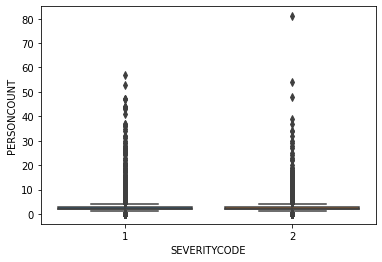

In [71]:
sns.boxplot(x="SEVERITYCODE", y="PERSONCOUNT", data=df)

We can see that person count has higher outliers in cases of severity code 2 so we will include this variable in our model

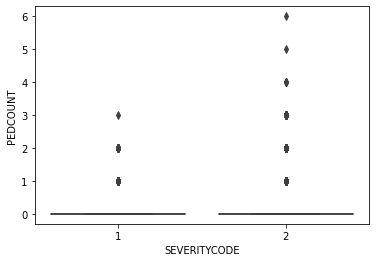

In [72]:
sns.boxplot(x="SEVERITYCODE", y="PEDCOUNT", data=df)

Again, pedcount has higher outliers in the more severe accident. We will also include this variable in our model

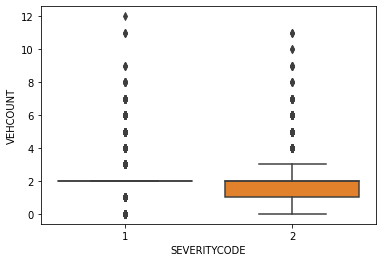

In [73]:
sns.boxplot(x="SEVERITYCODE", y="VEHCOUNT", data=df)

There is much higher variance in vehicle count for the more serious accidents with the boxplot also showing max and min values more spread out than the low severity case. We will include this variable in our model

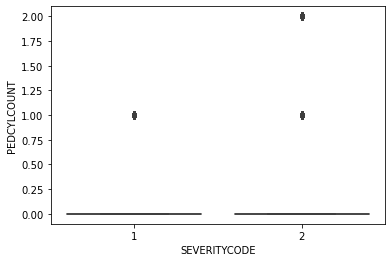

In [74]:
sns.boxplot(x="SEVERITYCODE", y="PEDCYLCOUNT", data=df)

The spread of the data is the same but in the more severe severitycode, there are outliers of 2 pedcycle count. We will include this in our model as the additional outlier could be beneficial in labelling an accident as severe if there are 2 pedcyclecount in a collision.

Now we will compare categorical variables against the categorical value: 'SEVERITYCODE'. We will plot the graph for fraudulent transactions and non fraudulent transactions and display the counts of the top 5 variables to see if there are differences between groups.

In [75]:
non_severe = df.loc[df['SEVERITYCODE']==1]
status = non_severe[['STATUS']]
status = status['STATUS'].value_counts()
status = status.to_frame()
status.index.name = 'newhead'
status.reset_index(inplace=True)

status.rename(columns = {'newhead': 'STATUS', 'STATUS': 'count'}, inplace=True)
status.head()

,STATUS,count
0,Matched,130314
1,Unmatched,3767


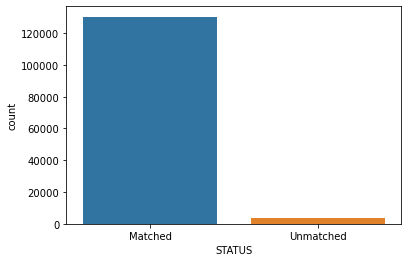

In [76]:
sns.barplot(x='STATUS', y='count', data = status)

In [77]:
severe = df.loc[df['SEVERITYCODE']==2]
status = severe[['STATUS']]
status = status['STATUS'].value_counts()
status = status.to_frame()
status.index.name = 'newhead'
status.reset_index(inplace=True)

status.rename(columns = {'newhead': 'STATUS', 'STATUS': 'count'}, inplace=True)
status.head()

,STATUS,count
0,Matched,56908
1,Unmatched,1007


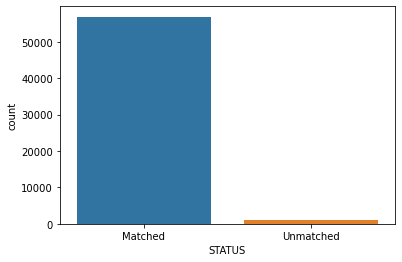

In [78]:
sns.barplot(x='STATUS', y='count', data = status)

The graphs look very similar and do not show much variation when going from collisions with property damage to collisions with injury, so this variable will not be included in our model.

In [79]:
addr = non_severe[['ADDRTYPE']]
addr = addr['ADDRTYPE'].value_counts()
addr = addr.to_frame()
addr.index.name = 'newhead'
addr.reset_index(inplace=True)

addr.rename(columns = {'newhead': 'ADDRTYPE', 'ADDRTYPE': 'count'}, inplace=True)
addr.head()

,ADDRTYPE,count
0,Block,96830
1,Intersection,37251


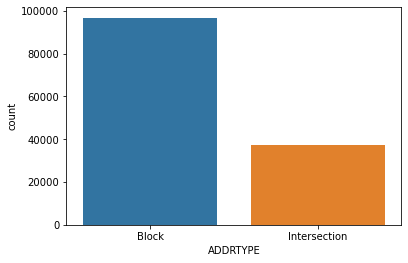

In [80]:
sns.barplot(x='ADDRTYPE', y='count', data = addr)

In [81]:
addr = severe[['ADDRTYPE']]
addr = addr['ADDRTYPE'].value_counts()
addr = addr.to_frame()
addr.index.name = 'newhead'
addr.reset_index(inplace=True)

addr.rename(columns = {'newhead': 'ADDRTYPE', 'ADDRTYPE': 'count'}, inplace=True)
addr.head()

,ADDRTYPE,count
0,Block,30096
1,Intersection,27819


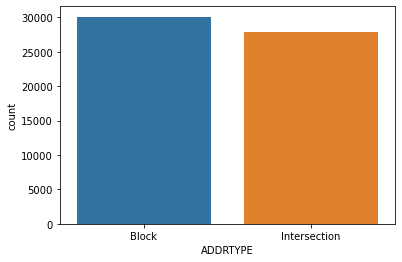

In [82]:
sns.barplot(x='ADDRTYPE', y='count', data = addr)

There are alot more accidents which are severe which occur in intersections. In non severe accidents we see a lower bar for intersection. There is a clear difference between both groups so we will include this variable in our model.

In [83]:
location = non_severe[['LOCATION']]
location = location['LOCATION'].value_counts()
location = location.to_frame()
location.index.name = 'newhead'
location.reset_index(inplace=True)

location.rename(columns = {'newhead': 'LOCATION', 'LOCATION': 'count'}, inplace=True)
location

,LOCATION,count
0,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,198
1,BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ...,185
2,ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ...,175
3,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,171
4,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,151
...,...,...
22590,KEEN WAY N BETWEEN STONE AVE N AND N 76TH ST,1
22591,40TH AVE S AND S HOLDEN ST,1
22592,CORLISS AVE N BETWEEN N 41ST ST AND N 42ND ST,1
22593,43RD AVE S AND S DAKOTA ST,1


In [84]:
location = severe[['LOCATION']]
location = location['LOCATION'].value_counts()
location = location.to_frame()
location.index.name = 'newhead'
location.reset_index(inplace=True)

location.rename(columns = {'newhead': 'LOCATION', 'LOCATION': 'count'}, inplace=True)
location

,LOCATION,count
0,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,120
1,6TH AVE AND JAMES ST,107
2,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,94
3,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,94
4,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,88
...,...,...
12481,DENSMORE AVE N AND N 125TH ST,1
12482,34TH AVE SW AND SW HENDERSON ST,1
12483,22ND AVE NW AND NW 57TH ST,1
12484,BEACON AVE S AND S HORTON ST,1


There is an apparent difference between locations which have had property damage as a result of collisions and locations which have had injuries as a result of collisions. Aurora Ave N between N 117th Pl and N 125th St has the highest number of injury related collisions but is not seen in the top 5 of the collisions which caused property damage. Therefore, we will include this variable in our model.

In [85]:
incdttm = non_severe[['INCDTTM']]
incdttm = incdttm['INCDTTM'].value_counts()
incdttm = incdttm.to_frame()
incdttm.index.name = 'newhead'
incdttm.reset_index(inplace=True)

incdttm.rename(columns = {'newhead': 'INCDTTM', 'INCDTTM': 'count'}, inplace=True)
incdttm

,INCDTTM,count
0,2008-10-03,66
1,2006-11-02,61
2,2006-01-13,59
3,2005-11-05,58
4,2005-05-18,56
...,...,...
5977,2020-04-19,1
5978,2020-04-07,1
5979,2020-04-05,1
5980,2020-05-18,1


In [86]:
incdttm = severe[['INCDTTM']]
incdttm = incdttm['INCDTTM'].value_counts()
incdttm = incdttm.to_frame()
incdttm.index.name = 'newhead'
incdttm.reset_index(inplace=True)

incdttm.rename(columns = {'newhead': 'INCDTTM', 'INCDTTM': 'count'}, inplace=True)
incdttm

,INCDTTM,count
0,2006-11-02,34
1,2008-03-14,31
2,2009-10-16,30
3,2008-10-31,28
4,2005-05-18,28
...,...,...
5966,2020-03-08,1
5967,2008-12-22,1
5968,2017-01-16,1
5969,2015-04-26,1


Seeing the spread of data on the tables allows us to see if there are days in which accidents were at a high. We see that there is some overlap with dates like 2006-11-02 and 2005-05-18, but there are also different dates, so we will include this variable into our model

In [87]:
junction = non_severe[['JUNCTIONTYPE']]
junction = junction['JUNCTIONTYPE'].value_counts()
junction = junction.to_frame()
junction.index.name = 'newhead'
junction.reset_index(inplace=True)

junction.rename(columns = {'newhead': 'JUNCTIONTYPE', 'JUNCTIONTYPE': 'count'}, inplace=True)
junction

,JUNCTIONTYPE,count
0,Mid-Block (not related to intersection),74009
1,At Intersection (intersection related),35620
2,Mid-Block (but intersection related),15480
3,Driveway Junction,7388
4,At Intersection (but not related to intersection),1472
5,Ramp Junction,112


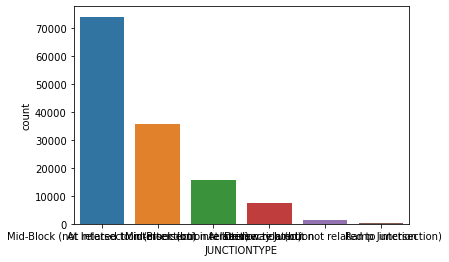

In [88]:
sns.barplot(x='JUNCTIONTYPE', y='count', data = junction)

In [89]:
junction = severe[['JUNCTIONTYPE']]
junction = junction['JUNCTIONTYPE'].value_counts()
junction = junction.to_frame()
junction.index.name = 'newhead'
junction.reset_index(inplace=True)

junction.rename(columns = {'newhead': 'JUNCTIONTYPE', 'JUNCTIONTYPE': 'count'}, inplace=True)
junction

,JUNCTIONTYPE,count
0,At Intersection (intersection related),27166
1,Mid-Block (not related to intersection),19556
2,Mid-Block (but intersection related),7295
3,Driveway Junction,3223
4,At Intersection (but not related to intersection),623
5,Ramp Junction,52


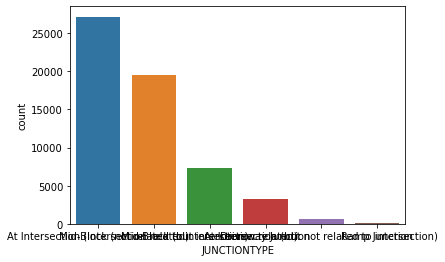

In [90]:
sns.barplot(x='JUNCTIONTYPE', y='count', data = junction)

We can see that there are differences in relevancy of junctions between injury related incidents and property related incidents. Injury related incidents have the highest frequency in at intersection collisions while property damage related incidents have the highest frequency in mid block collisions. We will include this variable in our model.

In [91]:
colcode = non_severe[['SDOT_COLCODE']]
colcode = colcode['SDOT_COLCODE'].value_counts()
colcode = colcode.to_frame()
colcode.index.name = 'newhead'
colcode.reset_index(inplace=True)

colcode.rename(columns = {'newhead': 'SDOT_COLCODE', 'SDOT_COLCODE': 'count'}, inplace=True)
colcode.head()

,SDOT_COLCODE,count
0,11,60792
1,14,36464
2,16,9225
3,0,6979
4,28,6542


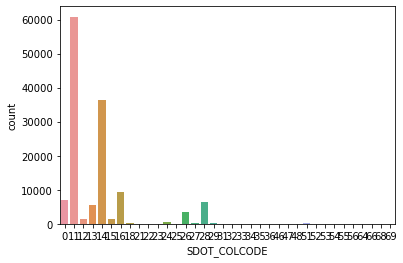

In [92]:
sns.barplot(x='SDOT_COLCODE', y='count', data = colcode)

In [93]:
colcode = severe[['SDOT_COLCODE']]
colcode = colcode['SDOT_COLCODE'].value_counts()
colcode = colcode.to_frame()
colcode.index.name = 'newhead'
colcode.reset_index(inplace=True)

colcode.rename(columns = {'newhead': 'SDOT_COLCODE', 'SDOT_COLCODE': 'count'}, inplace=True)
colcode.head()

,SDOT_COLCODE,count
0,11,24330
1,14,17733
2,24,5836
3,18,2732
4,28,2280


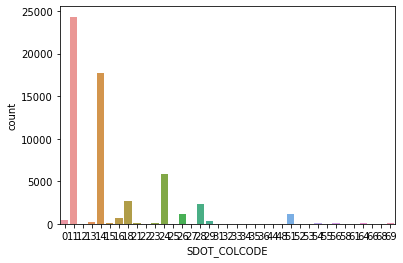

In [94]:
sns.barplot(x='SDOT_COLCODE', y='count', data = colcode)

The state collision code has common values in the same positions in both groups in terms of frequency. Values such as 11 and 14 are in the top 2 spots in both severities. However we notice differences in values as we go down the table so we will consider this variable in our model since there does not appear to be a high level of correlation between the two severities.

In [95]:
infl = non_severe[['UNDERINFL']]
infl = infl['UNDERINFL'].value_counts()
infl = infl.to_frame()
infl.index.name = 'newhead'
infl.reset_index(inplace=True)

infl.rename(columns = {'newhead': 'UNDERINFL', 'UNDERINFL': 'count'}, inplace=True)
infl.head()

,UNDERINFL,count
0,N,128575
1,Y,5506


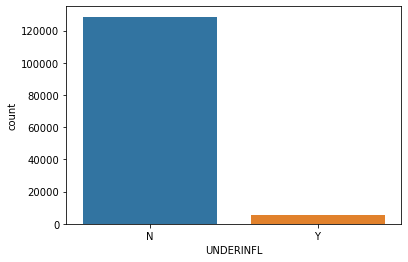

In [96]:
sns.barplot(x='UNDERINFL', y='count', data = infl)

In [97]:
infl = severe[['UNDERINFL']]
infl = infl['UNDERINFL'].value_counts()
infl = infl.to_frame()
infl.index.name = 'newhead'
infl.reset_index(inplace=True)

infl.rename(columns = {'newhead': 'UNDERINFL', 'UNDERINFL': 'count'}, inplace=True)
infl.head()

,UNDERINFL,count
0,N,54371
1,Y,3544


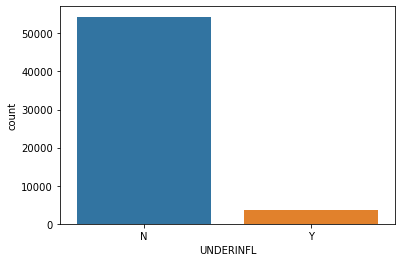

In [98]:
sns.barplot(x='UNDERINFL', y='count', data = infl)

In more severe accidents, we see that the bar for yes is slightly higher than that of accidents which only cause property damage. There are almost 3 times more non under influence counts in the property damage data but there are less than 2 times more under the influence counts in property damage accidents. This indicates that those who are driving under the influence are more likely to cause accidents which cause injury.

In [99]:
weather = non_severe[['WEATHER']]
weather = weather['WEATHER'].value_counts()
weather = weather.to_frame()
weather.index.name = 'newhead'
weather.reset_index(inplace=True)

weather.rename(columns = {'newhead': 'WEATHER', 'WEATHER': 'count'}, inplace=True)
weather

,WEATHER,count
0,Clear,87929
1,Raining,24522
2,Overcast,19603
3,Snowing,838
4,Other,673
5,Fog/Smog/Smoke,374
6,Sleet/Hail/Freezing Rain,85
7,Blowing Sand/Dirt,37
8,Severe Crosswind,18
9,Partly Cloudy,2


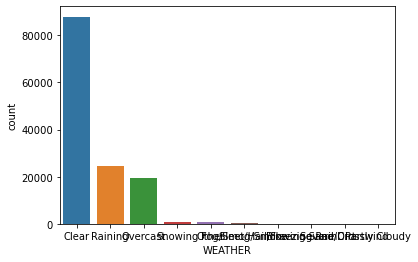

In [100]:
sns.barplot(x='WEATHER', y='count', data = weather)

In [101]:
weather = severe[['WEATHER']]
weather = weather['WEATHER'].value_counts()
weather = weather.to_frame()
weather.index.name = 'newhead'
weather.reset_index(inplace=True)

weather.rename(columns = {'newhead': 'WEATHER', 'WEATHER': 'count'}, inplace=True)
weather

,WEATHER,count
0,Clear,37284
1,Raining,11337
2,Overcast,8769
3,Fog/Smog/Smoke,186
4,Snowing,175
5,Other,114
6,Sleet/Hail/Freezing Rain,27
7,Blowing Sand/Dirt,13
8,Severe Crosswind,7
9,Partly Cloudy,3


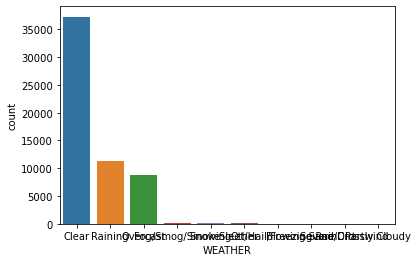

In [102]:
sns.barplot(x='WEATHER', y='count', data = weather)

We can see that the weather variable is highly correlated but it has different rankings for different weather between injury and property damage collision cases. Snowy weather is more likely the cause of an accident in property damage accidents compared to snow while fog is more likely to be the cause of an accident in injury accidents compared to snow.

In [103]:
roadcond = non_severe[['ROADCOND']]
roadcond = roadcond['ROADCOND'].value_counts()
roadcond = roadcond.to_frame()
roadcond.index.name = 'newhead'
roadcond.reset_index(inplace=True)

roadcond.rename(columns = {'newhead': 'ROADCOND', 'ROADCOND': 'count'}, inplace=True)
roadcond

,ROADCOND,count
0,Dry,97167
1,Wet,34792
2,Ice,974
3,Snow/Slush,899
4,Other,83
5,Standing Water,82
6,Sand/Mud/Dirt,44
7,Oil,40


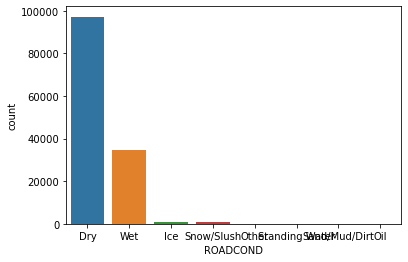

In [104]:
sns.barplot(x='ROADCOND', y='count', data = roadcond)

In [105]:
roadcond = severe[['ROADCOND']]
roadcond = roadcond['ROADCOND'].value_counts()
roadcond = roadcond.to_frame()
roadcond.index.name = 'newhead'
roadcond.reset_index(inplace=True)

roadcond.rename(columns = {'newhead': 'ROADCOND', 'ROADCOND': 'count'}, inplace=True)
roadcond

,ROADCOND,count
0,Dry,41433
1,Wet,15926
2,Ice,272
3,Snow/Slush,167
4,Other,42
5,Standing Water,29
6,Oil,24
7,Sand/Mud/Dirt,22


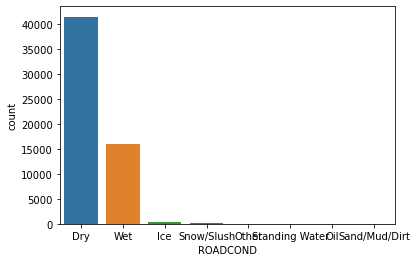

In [106]:
sns.barplot(x='ROADCOND', y='count', data = roadcond)

The road condition is very similar in both cases so we will leave out this variable from our model.

In [107]:
light = non_severe[['LIGHTCOND']]
light = light['LIGHTCOND'].value_counts()
light = light.to_frame()
light.index.name = 'newhead'
light.reset_index(inplace=True)

light.rename(columns = {'newhead': 'LIGHTCOND', 'LIGHTCOND': 'count'}, inplace=True)
light

,LIGHTCOND,count
0,Daylight,90570
1,Dark - Street Lights On,35765
2,Dusk,3900
3,Dawn,1661
4,Dark - No Street Lights,1150
5,Dark - Street Lights Off,861
6,Other,174


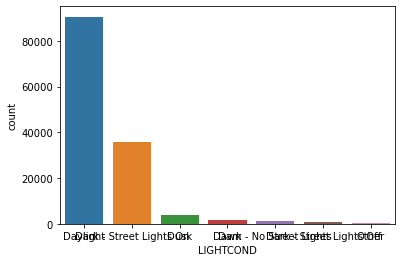

In [108]:
sns.barplot(x='LIGHTCOND', y='count', data = light)

In [109]:
light = severe[['LIGHTCOND']]
light = light['LIGHTCOND'].value_counts()
light = light.to_frame()
light.index.name = 'newhead'
light.reset_index(inplace=True)

light.rename(columns = {'newhead': 'LIGHTCOND', 'LIGHTCOND': 'count'}, inplace=True)
light

,LIGHTCOND,count
0,Daylight,39933
1,Dark - Street Lights On,14529
2,Dusk,1937
3,Dawn,822
4,Dark - No Street Lights,327
5,Dark - Street Lights Off,315
6,Other,52


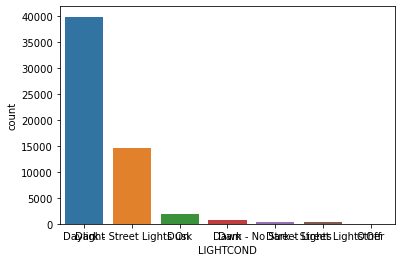

In [110]:
sns.barplot(x='LIGHTCOND', y='count', data = light)

The lighting condition does not differ among different accident severities so we will leave this variable out of our model

In [111]:
df.dtypes

SEVERITYCODE    object
STATUS          object
ADDRTYPE        object
LOCATION        object
PERSONCOUNT      int64
PEDCOUNT         int64
PEDCYLCOUNT      int64
VEHCOUNT         int64
INCDTTM         object
JUNCTIONTYPE    object
SDOT_COLCODE    object
UNDERINFL       object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
ST_COLCODE      object
HITPARKEDCAR    object
dtype: object

In [112]:
st_colcode = non_severe[['ST_COLCODE']]
st_colcode = st_colcode['ST_COLCODE'].value_counts()
st_colcode = st_colcode.to_frame()
st_colcode.index.name = 'newhead'
st_colcode.reset_index(inplace=True)

st_colcode.rename(columns = {'newhead': 'ST_COLCODE', 'ST_COLCODE': 'count'}, inplace=True)
st_colcode

,ST_COLCODE,count
0,32,40859
1,10,20951
2,14,14286
3,11,10924
4,50,9985
...,...,...
56,8,2
57,43,2
58,7,1
59,85,1


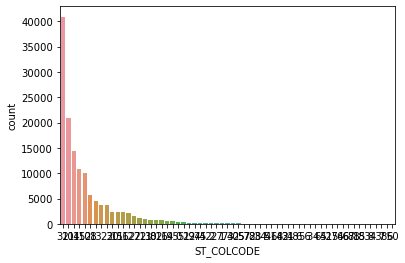

In [113]:
sns.barplot(x='ST_COLCODE', y='count', data = st_colcode)

In [114]:
st_colcode = severe[['ST_COLCODE']]
st_colcode = st_colcode['ST_COLCODE'].value_counts()
st_colcode = st_colcode.to_frame()
st_colcode.index.name = 'newhead'
st_colcode.reset_index(inplace=True)

st_colcode.rename(columns = {'newhead': 'ST_COLCODE', 'ST_COLCODE': 'count'}, inplace=True)
st_colcode

,ST_COLCODE,count
0,10,13600
1,14,11303
2,28,4626
3,45,4113
4,50,3261
5,13,3030
6,0,2547
7,32,2154
8,2,1998
9,11,1747


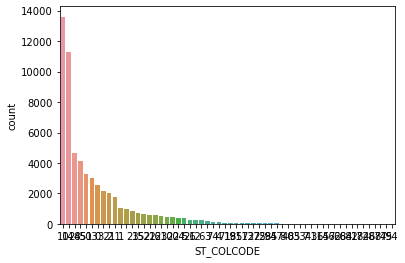

In [115]:
sns.barplot(x='ST_COLCODE', y='count', data = st_colcode)

There is a clear difference in state colcode since the highest frequency value for non-severe accidents is 32 and the highest frequency value for injury accidents is 10. We will include this variable in our model

In [116]:
parkedcar = non_severe[['HITPARKEDCAR']]
parkedcar = parkedcar['HITPARKEDCAR'].value_counts()
parkedcar = parkedcar.to_frame()
parkedcar.index.name = 'newhead'
parkedcar.reset_index(inplace=True)

parkedcar.rename(columns = {'newhead': 'HITPARKEDCAR', 'HITPARKEDCAR': 'count'}, inplace=True)
parkedcar.head()

,HITPARKEDCAR,count
0,N,127512
1,Y,6569


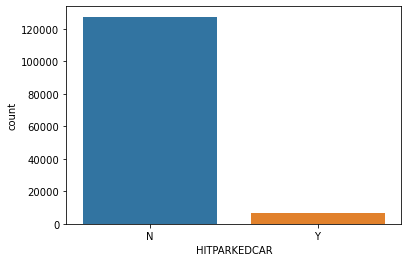

In [117]:
sns.barplot(x='HITPARKEDCAR', y='count', data = parkedcar)

In [118]:
parkedcar = severe[['HITPARKEDCAR']]
parkedcar = parkedcar['HITPARKEDCAR'].value_counts()
parkedcar = parkedcar.to_frame()
parkedcar.index.name = 'newhead'
parkedcar.reset_index(inplace=True)

parkedcar.rename(columns = {'newhead': 'HITPARKEDCAR', 'HITPARKEDCAR': 'count'}, inplace=True)
parkedcar.head()

,HITPARKEDCAR,count
0,N,57469
1,Y,446


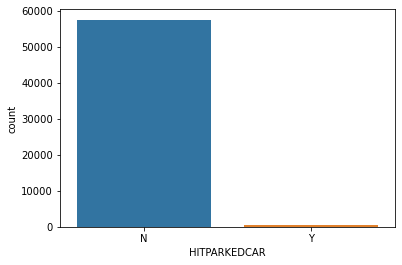

In [119]:
sns.barplot(x='HITPARKEDCAR', y='count', data = parkedcar)

There are alot fewer yes responses to injury related collisions even factoring in the higher sample count in non injury cases, so it would appear to be beneficial including this variable in our model. It logically makes sense that collisions which involve hitting a parked car would only cause property damage in many cases. This backs up that theory.

### Variable Selection for Model

Based on our data analysis, the variables we will use are 'PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT, 'PEDCYLCOUNT', 'ADDRTYPE', 'LOCATION', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'UNDERINFL', 'WEATHER', 'ST_COLCODE', 'HITPARKEDCAR'. We will drop the other columns

Lets see the variables we have thus far and drop the variables we don't need

In [120]:
df.dtypes

SEVERITYCODE    object
STATUS          object
ADDRTYPE        object
LOCATION        object
PERSONCOUNT      int64
PEDCOUNT         int64
PEDCYLCOUNT      int64
VEHCOUNT         int64
INCDTTM         object
JUNCTIONTYPE    object
SDOT_COLCODE    object
UNDERINFL       object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
ST_COLCODE      object
HITPARKEDCAR    object
dtype: object

In [121]:
drop_list = ['STATUS',  'ROADCOND', 'LIGHTCOND']
new_df = df
new_df.drop(drop_list, axis=1, inplace=True)
new_df

,SEVERITYCODE,ADDRTYPE,LOCATION,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ST_COLCODE,HITPARKEDCAR
0,2,Intersection,5TH AVE NE AND NE 103RD ST,2,0,0,2,2013-03-27,At Intersection (intersection related),11,N,Overcast,10,N
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2,0,0,2,2006-12-20,Mid-Block (not related to intersection),16,N,Raining,11,N
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,4,0,0,3,2004-11-18,Mid-Block (not related to intersection),14,N,Overcast,32,N
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,3,0,0,3,2013-03-29,Mid-Block (not related to intersection),11,N,Clear,23,N
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,2,0,0,2,2004-01-28,At Intersection (intersection related),11,N,Raining,10,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191991,2,Block,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,3,0,0,2,2018-11-12,Mid-Block (not related to intersection),11,N,Clear,24,N
191992,1,Block,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,2,0,0,2,2018-12-18,Mid-Block (not related to intersection),14,N,Raining,13,N
191993,2,Intersection,20TH AVE NE AND NE 75TH ST,3,0,0,2,2019-01-19,At Intersection (intersection related),11,N,Clear,28,N
191994,2,Intersection,GREENWOOD AVE N AND N 68TH ST,2,0,1,1,2019-01-15,At Intersection (intersection related),51,N,Clear,5,N


Now we must convert our categorical values into numbers since they must be able to be used in our model. To do this, we use the factorize method in pandas to convert categorical columns in numerical columns

In [122]:
new_df.dtypes

SEVERITYCODE    object
ADDRTYPE        object
LOCATION        object
PERSONCOUNT      int64
PEDCOUNT         int64
PEDCYLCOUNT      int64
VEHCOUNT         int64
INCDTTM         object
JUNCTIONTYPE    object
SDOT_COLCODE    object
UNDERINFL       object
WEATHER         object
ST_COLCODE      object
HITPARKEDCAR    object
dtype: object

In [123]:
addr = new_df['ADDRTYPE']
codes_addr, uniques_addr = pd.factorize(addr)
new_df['ADDRTYPE'] = codes_addr

In [124]:
location = new_df['LOCATION']
codes_location, uniques_location = pd.factorize(location)
new_df['LOCATION'] = codes_location

In [125]:
date = new_df['INCDTTM']
codes_date, uniques_date = pd.factorize(date)
new_df['INCDTTM'] = codes_date

In [126]:
junc = new_df['JUNCTIONTYPE']
codes_junc, uniques_junc = pd.factorize(junc)
new_df['JUNCTIONTYPE'] = codes_junc

In [127]:
sdot = new_df['SDOT_COLCODE']
codes_sdot, uniques_sdot = pd.factorize(sdot)
new_df['SDOT_COLCODE'] = codes_sdot

In [128]:
infl = new_df['UNDERINFL']
codes_infl, uniques_infl = pd.factorize(infl)
new_df['UNDERINFL'] = codes_infl

In [129]:
weather = new_df['WEATHER']
codes_weather, uniques_weather = pd.factorize(weather)
new_df['WEATHER'] = codes_weather

In [130]:
st_colcode = new_df['ST_COLCODE']
codes_st_colcode, uniques_st_colcode = pd.factorize(st_colcode)
new_df['ST_COLCODE'] = codes_st_colcode

In [131]:
parked = new_df['HITPARKEDCAR']
codes_parked, uniques_parked = pd.factorize(parked)
new_df['HITPARKEDCAR'] = codes_parked

Now we get our y vector. This vector contains the labels for every row in our dataset. The dependent variable in our model is the 'SEVERITYCODE' column. We will use this column as our y vector and convert it to integer values 

In [132]:
y = new_df['SEVERITYCODE']
y = y.astype(int)
y.head()

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int32

We can now drop the SEVERITYCODE column from our matrix and label it as X

In [133]:
X = new_df.drop('SEVERITYCODE', axis=1)

Let's have a look at the data

In [134]:
X.head()

,ADDRTYPE,LOCATION,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ST_COLCODE,HITPARKEDCAR
0,0,0,2,0,0,2,0,0,0,0,0,0,0
1,1,1,2,0,0,2,1,1,1,0,1,1,0
2,1,2,4,0,0,3,2,1,2,0,0,2,0
3,1,3,3,0,0,3,3,1,0,0,2,3,0
4,0,4,2,0,0,2,4,0,0,0,1,0,0


First let's split the data into train and test data. We will then balance the training data so that there is not bias in prediction towards property damage severity cases, but we will leave the test data as is so that it imitates real life. Afterwards we will preprocess our data so that all the values are normalized. We do this because columns like ST_COLCODE have high values which when left unnormalized, can result in heavier weight in ST_COLCODE over other variables.

In [135]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [137]:
type(X_train)
type(y_train)
X_train.head()

,ADDRTYPE,LOCATION,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ST_COLCODE,HITPARKEDCAR
164341,1,7330,3,0,0,2,862,1,0,0,1,1,0
31213,0,522,2,0,0,2,358,0,2,0,1,8,0
174748,0,4682,2,0,0,2,5480,0,0,0,2,0,0
64402,1,16486,2,0,0,2,3095,3,2,0,2,5,0
110660,0,1710,2,0,0,2,370,0,0,0,2,8,0


In [138]:
X_train['SEVERITYCODE'] = y_train

<ipython-input-138-0eb03758b1a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['SEVERITYCODE'] = y_train


In [139]:
df_property = X_train[X_train.SEVERITYCODE==1]
df_injury = X_train[X_train.SEVERITYCODE==2]
df_property_resample = df_property.sample(replace=False, n=df_injury.shape[0], random_state=2)
X_train = pd.concat([df_property_resample, df_injury])

In [140]:
X_train.head()

,ADDRTYPE,LOCATION,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ST_COLCODE,HITPARKEDCAR,SEVERITYCODE
52878,1,3053,3,0,0,3,887,1,2,1,2,2,0,1
189915,0,2786,2,0,0,0,2038,0,2,0,2,7,0,1
96204,0,12625,2,0,0,2,3897,0,0,0,2,8,0,1
115803,0,10321,2,0,0,2,4213,0,0,0,1,0,0,1
22825,1,6476,6,0,0,3,2297,1,0,0,1,1,0,1


In [141]:
y_train = X_train['SEVERITYCODE']
del X_train['SEVERITYCODE']

Here we preprocess the train and test data

In [142]:
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_train[0:5]

array([[ 7.80787144e-01, -5.54368807e-01,  3.37826210e-01,
        -2.38138550e-01, -2.13897922e-01,  1.63549097e+00,
        -1.14262010e+00,  3.39667693e-02, -1.39184301e-01,
         4.29810469e+00,  5.74437190e-01, -6.50590166e-01,
        -1.71326289e-01],
       [-1.28075879e+00, -6.02097089e-01, -3.74060972e-01,
        -2.38138550e-01, -2.13897922e-01, -2.85340518e+00,
        -4.66487886e-01, -9.58778851e-01, -1.39184301e-01,
        -2.32660689e-01,  5.74437190e-01,  4.64288026e-04,
        -1.71326289e-01],
       [-1.28075879e+00,  1.15669905e+00, -3.74060972e-01,
        -2.38138550e-01, -2.13897922e-01,  1.39192250e-01,
         6.25544947e-01, -9.58778851e-01, -6.73037958e-01,
        -2.32660689e-01,  5.74437190e-01,  1.30675179e-01,
        -1.71326289e-01],
       [-1.28075879e+00,  7.44841516e-01, -3.74060972e-01,
        -2.38138550e-01, -2.13897922e-01,  1.39192250e-01,
         8.11172905e-01, -9.58778851e-01, -6.73037958e-01,
        -2.32660689e-01, -6.75804218e

# Model Selection and Evaluation

Our problem is a classification problem. We must choose between KNN, SVM, Decision Trees or Logistic Regression for our model. We can try each model and test the results, then we can select the model which yields the highest accuracy.

## Decision Trees

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [144]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
for i in range(1,11):
    severityTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    severityTree.fit(X_train,y_train)
    prediction = severityTree.predict(X_test)
    print ('Depth of the tree is: ' + str(i))
    print (classification_report(y_test, prediction))

Depth of the tree is: 1
              precision    recall  f1-score   support

           1       0.81      0.58      0.67     13309
           2       0.42      0.69      0.52      5891

    accuracy                           0.61     19200
   macro avg       0.61      0.63      0.60     19200
weighted avg       0.69      0.61      0.63     19200

Depth of the tree is: 2
              precision    recall  f1-score   support

           1       0.92      0.42      0.58     13309
           2       0.41      0.92      0.57      5891

    accuracy                           0.57     19200
   macro avg       0.67      0.67      0.57     19200
weighted avg       0.77      0.57      0.58     19200

Depth of the tree is: 3
              precision    recall  f1-score   support

           1       0.92      0.42      0.58     13309
           2       0.41      0.92      0.57      5891

    accuracy                           0.57     19200
   macro avg       0.67      0.67      0.57     19200
we

In [145]:
severityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 50)
severityTree.fit(X_train,y_train)
prediction = severityTree.predict(X_test)
print (classification_report(y_test, prediction))

DecisionTreeClassifier(criterion='entropy', max_depth=50)

              precision    recall  f1-score   support

           1       0.80      0.63      0.70     13309
           2       0.43      0.64      0.52      5891

    accuracy                           0.63     19200
   macro avg       0.62      0.63      0.61     19200
weighted avg       0.69      0.63      0.65     19200



In [146]:
severityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 100)
severityTree.fit(X_train,y_train)
prediction = severityTree.predict(X_test)
print (classification_report(y_test, prediction))

DecisionTreeClassifier(criterion='entropy', max_depth=100)

              precision    recall  f1-score   support

           1       0.79      0.64      0.71     13309
           2       0.43      0.62      0.51      5891

    accuracy                           0.63     19200
   macro avg       0.61      0.63      0.61     19200
weighted avg       0.68      0.63      0.65     19200



In [147]:
severityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
severityTree.fit(X_train,y_train)
prediction = severityTree.predict(X_test)
print (classification_report(y_test, prediction))

DecisionTreeClassifier(criterion='entropy', max_depth=7)

              precision    recall  f1-score   support

           1       0.85      0.69      0.76     13309
           2       0.50      0.72      0.59      5891

    accuracy                           0.70     19200
   macro avg       0.67      0.70      0.68     19200
weighted avg       0.74      0.70      0.71     19200



We tested our data on many depths for our decision trees. Ultimately, the best score was obtained by the tree with a max depth of 7. We received an overall average f1-score of 0.7. The model was able to correctly identify 72% of all injury causing accidents and 69% of all property damage accidents. The model was also 85% correct when it labelled an accident as a property damage accident, and 50% correct when it labelled an accident as an injury related accident. 

## K Nearest Neighbours

We will be creating the K Nearest Neighbours model now. We will be testing models with k values equal to 1 up to k values equal to 10.

In [148]:
from sklearn.neighbors import KNeighborsClassifier

In [149]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
k = 11
means = []
for i in range(1,k):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    knn_prediction = knn.predict(X_test)
    print('KNN results for K value: '+str(i))
    print(classification_report(y_test, knn_prediction))
    
    

KNN results for K value: 1
              precision    recall  f1-score   support

           1       0.80      0.64      0.71     13309
           2       0.44      0.64      0.52      5891

    accuracy                           0.64     19200
   macro avg       0.62      0.64      0.62     19200
weighted avg       0.69      0.64      0.66     19200

KNN results for K value: 2
              precision    recall  f1-score   support

           1       0.77      0.81      0.79     13309
           2       0.52      0.46      0.48      5891

    accuracy                           0.70     19200
   macro avg       0.64      0.63      0.64     19200
weighted avg       0.69      0.70      0.70     19200

KNN results for K value: 3
              precision    recall  f1-score   support

           1       0.82      0.66      0.73     13309
           2       0.47      0.68      0.55      5891

    accuracy                           0.66     19200
   macro avg       0.64      0.67      0.64    

The model with the highest average f1-score and best results from all of our KNN models was the model with a K value of 8. There were many models which got an average f1-score of 0.70, like the K value = 8 model. The distinguishing factor is that the k value = 8 model had the highest recall score when considering all outputs. The model was able to predict 73% of all property damage accidents and 63% of all injury accidents while being 82% correct in it's prediction when it labelled an accident as a property damage accident and 50% correct when it labelled an accident as an injury related accident.

In [150]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [151]:
yhat_clf = clf.predict(X_test)

In [152]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat_clf))

              precision    recall  f1-score   support

           1       0.85      0.65      0.74     13309
           2       0.49      0.75      0.59      5891

    accuracy                           0.68     19200
   macro avg       0.67      0.70      0.66     19200
weighted avg       0.74      0.68      0.69     19200



The SVM model was able to predict 75% of all injury related accidents and was 49% correct when it labelled an accident as an injury related accident. Additionally, it was able to predict 65% of all property damage accidents and was 85% correct when it labelled an accident as property damage. The f1 score was 0.74 and 0.59 for property damage accidents and injury accidents respectively earning it an average f1 score of 0.68.

In [153]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01).fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.81      0.66      0.72     13309
           2       0.46      0.65      0.54      5891

    accuracy                           0.65     19200
   macro avg       0.63      0.65      0.63     19200
weighted avg       0.70      0.65      0.67     19200



The logistic regression model was able to predict 66% of all property damage accidents and 65% of all injury related accidents. It was also 81% correct when it labelled an accident as a property damage accident and 46% correct when it labelled an accident as an injury related accident. This model did worse than the SVM model but did a decent job overall as a severity predictor.

The decision tree model was the best model we were able to create since it has the highest precision and recall of all the models we have created. This will be the model which should be chosen to perform accident severity prediction with the available data.

# Results

Our analysis was able to show us that the relevant variables we should use in our models were 'PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT, 'PEDCYLCOUNT', 'ADDRTYPE', 'LOCATION', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'UNDERINFL', 'WEATHER', 'ST_COLCODE', and 'HITPARKEDCAR'. Then we dropped all other variables and factorized the categorical variables so that they can be used in fitting and testing for our models. A range of values were used in our decision tree and knn models for the number of trees and K neighbours, respectively. An SVM and Logistic Regression model was also created for the data but ultimately the decision tree with a depth of 7 was the most successful model.

The decision tree was able to give us a precision score of 0.85 and a recall score of 0.69 for the prediction of a property damage accident and a precision score of 0.50 and a recall score of 0.72 for the prediction of an injury accident. Other models were able to obtain similar results, with the second-best model being a KNN model with a k value of 8. The KNN model was able to give us precision and recall scores of 0.82 and 0.73 for property damage accidents, and 0.50 and 0.63 for injury causing accidents. 

The decision tree's accuracy in plain English, can identify 69% of all property damage accidents and 72% of all injury causing accidents. Furthermore, when it did predict an accident as a property damage accident, it was correct 85% of the time. In the case of injury causing accidents, it was correct 50% of the time. These were collectively, the highest numbers we were able to obtain from any model, giving us confidence that this is the best model to use given the data we have.


# Discussion
Our findings do not solely rely on recall as our focus is not to save individuals who are in the accident, but to assist GPS navigation systems in predicting routes around the accident. As a result, it is important for us to factor in precision, recall and the f1-score. Our findings were able to point us towards the direction of our decision tree with a depth of 7 branches. This was able to provide us with the most accurate model of all our models we created.

It is important to note that our model is not as reliable as we had hoped considering the model still makes a mistake in identifying 31% of property damage accidents and 28% of injury related accidents, but it does point us towards the right direction. It would be helpful to include more information to better predict the severity of an accident. Car information, number of officers, number of ambulances, and number of tow trucks could help us increase the reliability of our models thus increase the reliability in a GPS not directing drivers towards traffic.

# Conclusion

The purpose of this project was to be able to create a model which would be able to correctly label an accident as a property damage accident or an injury related accident. Determining this severity would ultimately be able to assist GPS companies in routing users away from an accident scene if the accident is severe enough. Our model was able to detect 72% of all injury related accidents and 69% of all property related accidents, however it still has room for improvement. This report should be used as a base point for which an even reliable model can be created upon. Ultimately, the model was limited due to the lack of information available to us by the given data. With a greater amount of information, a more reliable model should be able to be created, giving great benefit to the company providing directions, and the customers using the software following the directions.